In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load Data

In [2]:
# importing the dataset to a variable
data = pd.read_csv("K:/CIC-2017-dataset/CIC-IDS-2017/MergedML_CSV/feature14.csv")

# displaying first 3 observations
data.head(3)

,Destination Port,Init_Win_bytes_forward,Init_Win_bytes_backward,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Average Packet Size,Bwd Packet Length Std,Fwd Packet Length Std,Packet Length Std,Total Backward Packets,Total Length of Bwd Packets,min_seg_size_forward,Label
0,49188,329,-1,4,4,0,9.0,0.0,0.0,0.0,0,0,20,0
1,49188,329,-1,1,1,0,9.0,0.0,0.0,0.0,0,0,20,0
2,49188,329,-1,1,1,0,9.0,0.0,0.0,0.0,0,0,20,0


In [3]:
print(data[' Label'].value_counts())

0    1984531
2     252661
7     158930
6     128027
1      13835
4       2180
5       1966
3         11
Name:  Label, dtype: int64


In [4]:
data[' Label'] = data[' Label'].map({0:0, 
                                     1:1, 2:1,
                                     3:1, 4:1,
                                     5:1, 6:1,
                                     7:1
                                     })

In [5]:
print(data[' Label'].value_counts())

0    1984531
1     557610
Name:  Label, dtype: int64


In [6]:
# feeding sample features to var 'X'
X = data.iloc[:,:-1]

# feeding our target variable to var 'y'
y = data[' Label']

In [7]:
X.shape

(2542141, 13)

In [8]:
y.shape

(2542141,)

In [9]:
data.shape

(2542141, 14)

# Feature selection

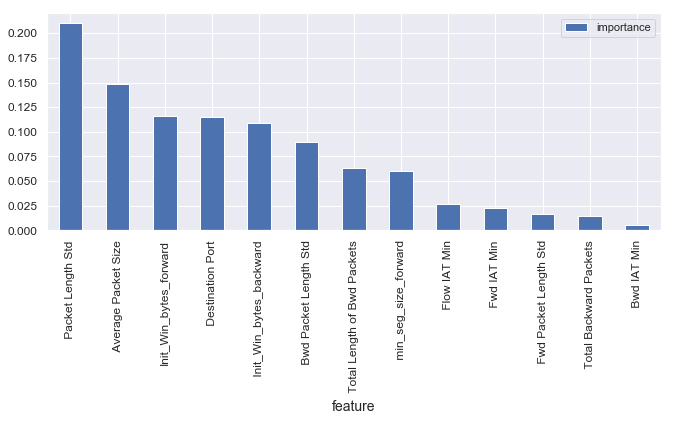

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X, y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

# data scaling

In [23]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))


# apply feature scaling to all features
X_scaled = scaler.fit_transform(X)
#s_sample_2 = scaler.fit_transform(X2)


# turn the result back to a dataframe
X_scaledDf = pd.DataFrame(X_scaled)

In [24]:
X_scaledDf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06
mean,1.229541e-01,1.090973e-01,3.106376e-02,1.436402e-03,8.809428e-03,8.256692e-03,5.208239e-02,4.416211e-02,1.011973e-02,6.683958e-02,3.722715e-05,2.639086e-05,9.999941e-01
std,2.802870e-01,2.208349e-01,1.300099e-01,2.532519e-02,7.276738e-02,7.009182e-02,8.814179e-02,1.071364e-01,4.110496e-02,1.392475e-01,3.603056e-03,3.642119e-03,2.132583e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.087282e-04,0.000000e+00,0.000000e+00,1.416667e-07,9.999999e-08,0.000000e+00,2.311644e-03,0.000000e+00,0.000000e+00,4.880883e-04,3.425573e-06,9.153974e-09,9.999998e-01
50%,1.220722e-03,3.845215e-03,0.000000e+00,1.500000e-07,1.250000e-07,8.333333e-09,1.913527e-02,0.000000e+00,0.000000e+00,5.788016e-03,6.851145e-06,1.983361e-07,9.999998e-01
75%,6.759747e-03,1.250153e-01,3.601074e-03,6.666666e-07,5.000000e-07,3.750000e-07,4.059932e-02,1.592875e-02,4.366329e-03,4.724016e-02,1.712786e-05,9.199744e-07,9.999998e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542141 entries, 0 to 2542140
Data columns (total 13 columns):
 Destination Port               int64
Init_Win_bytes_forward          int64
 Init_Win_bytes_backward        int64
 Flow IAT Min                   int64
 Fwd IAT Min                    int64
 Bwd IAT Min                    int64
 Average Packet Size            float64
 Bwd Packet Length Std          float64
 Fwd Packet Length Std          float64
 Packet Length Std              float64
 Total Backward Packets         int64
 Total Length of Bwd Packets    int64
 min_seg_size_forward           int64
dtypes: float64(4), int64(9)
memory usage: 252.1 MB


# Feature selection again after data scaling

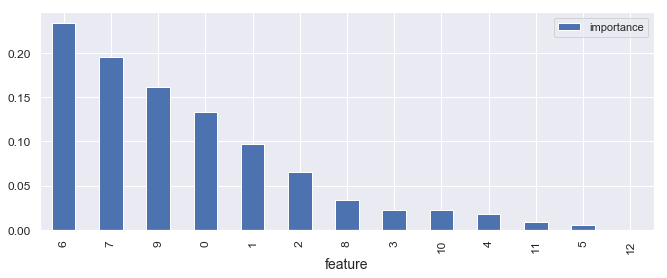

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_scaledDf, y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_scaledDf.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

# Dataset Partition

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaledDf,y,train_size=0.75, random_state=2)

# Fitting the models

In [ ]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Evaluate the models

In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.6764321926875241

Model Accuracy:
 0.6764321922999258

Confusion matrix:
 [[1095005  393563]
 [ 223353  194684]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78   1488568
           1       0.33      0.47      0.39    418037

   micro avg       0.68      0.68      0.68   1906605
   macro avg       0.58      0.60      0.58   1906605
weighted avg       0.72      0.68      0.69   1906605



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994471848406578

Model Accuracy:
 0.9998117071968237

Confusion matrix:
 [[1488224     344]
 [     15  418022]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1488568
           1  

# Validating models

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        